In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas,numpy,random
import matplotlib.pyplot as plt

In [24]:
class MnistDataset(Dataset):
    def __init__(self,csv_file):
        self.data_df = pandas.read_csv(csv_file,header=None)

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros(10)
        target[label] = 1.0

        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label,image_values,target

    def plot_image(self,index):
        arr = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(arr,interpolation='none',cmap='Blues')

In [25]:
mnist_dataset = MnistDataset('mnist_dataset/mnist_train.csv')
#mnist_dataset.plot_image(17)

In [26]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            # nn.Sigmoid(),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),
            
            nn.Linear(200,1),
            nn.Sigmoid()
        )

        # 神经网络执行分类任务时，二元交叉熵更适用。相比于均方误差，它更大程度地奖励正确的分类结果，同时惩罚错误的结果。
        #self.loss_function = nn.MSELoss() # 均方误差
        self.loss_function = nn.BCELoss() # 二元交叉熵
        # self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []
        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass

In [27]:
def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [28]:
D = Discriminator()
# for label, image_date_tensor, target_tensor in mnist_dataset:
#    D.train(image_date_tensor, torch.FloatTensor([1.0]))
#    D.train(generate_random_image(784), torch.FloatTensor([0.0]))

In [29]:
#D.plot_progress()

In [30]:
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
    print(D.forward(image_data_tensor).item())
for i in range(4):
    print(D.forward(generate_random(784)).item())    

0.4310586452484131
0.42680487036705017
0.6962631344795227
0.5039921402931213
0.5881213545799255
0.5905634760856628
0.5964822769165039
0.6019864082336426


In [31]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 200),
            # nn.Sigmoid(),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            
            nn.Linear(200,784),
            nn.Sigmoid()
        )

        # self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        
        self.counter = 0
        self.progress = []
        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        
        loss = D.loss_function(d_output, targets)
        
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass

In [32]:
G = Generator()
# output = G.forward(generate_random(100))
# img = output.detach().numpy().reshape(28,28)
# plt.imshow(img, interpolation='none',cmap='Blues')

In [39]:
%%time
epochs = 4

for epoch in range(epochs):
    print ("epoch = ", epoch + 1)
    # 训练鉴别器和生成器
    for label, image_data_tensor, target_tensor in mnist_dataset:
    
        # 使用真实数据训练鉴别器
        D.train(image_data_tensor, torch.FloatTensor([1.0]))
    
        # 用生成样本训练鉴别器
        # 使用detach()以避免计算生成器G中的梯度
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))
    
        # 训练生成器
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
    
        pass

epoch =  1
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  2
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  3
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
epoch =  4
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000
counter =  540000
counter =  550000
counter =  560000
counter =  570000
counter =  580000
counter =  590000
counter =  600000
CPU times: user 27min 5s, sys: 16min 24s, total: 43min 29s
Wall time: 30min 33s


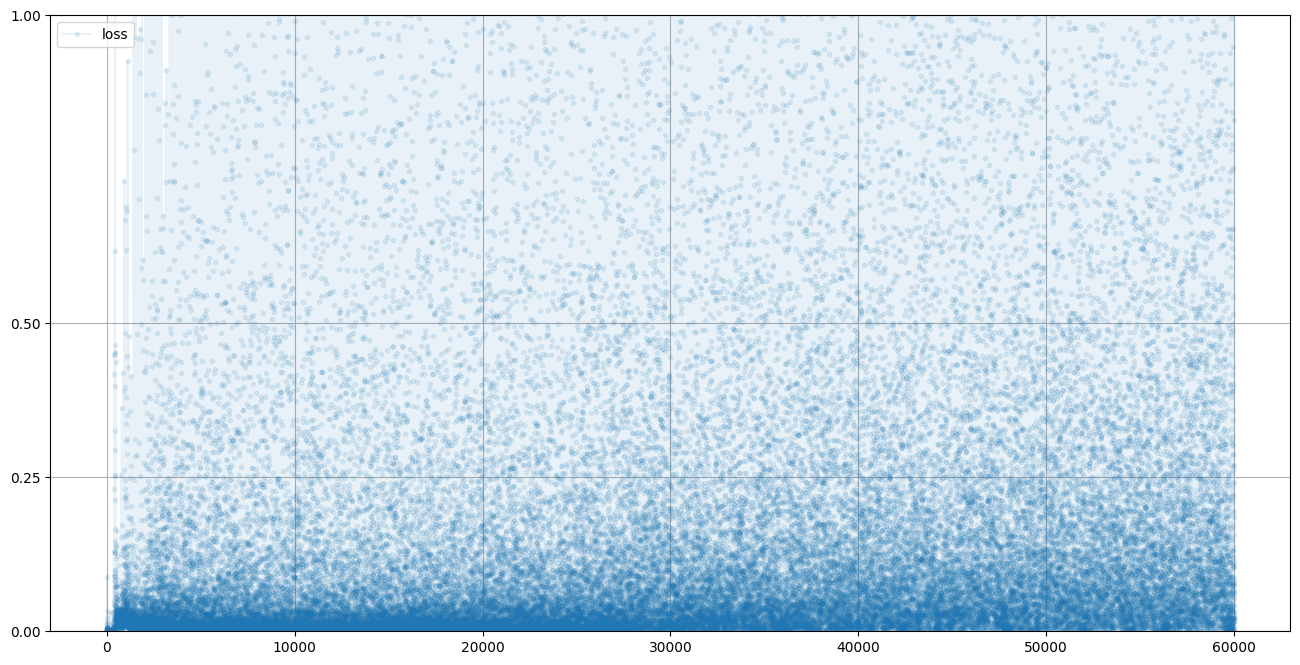

In [40]:
D.plot_progress()

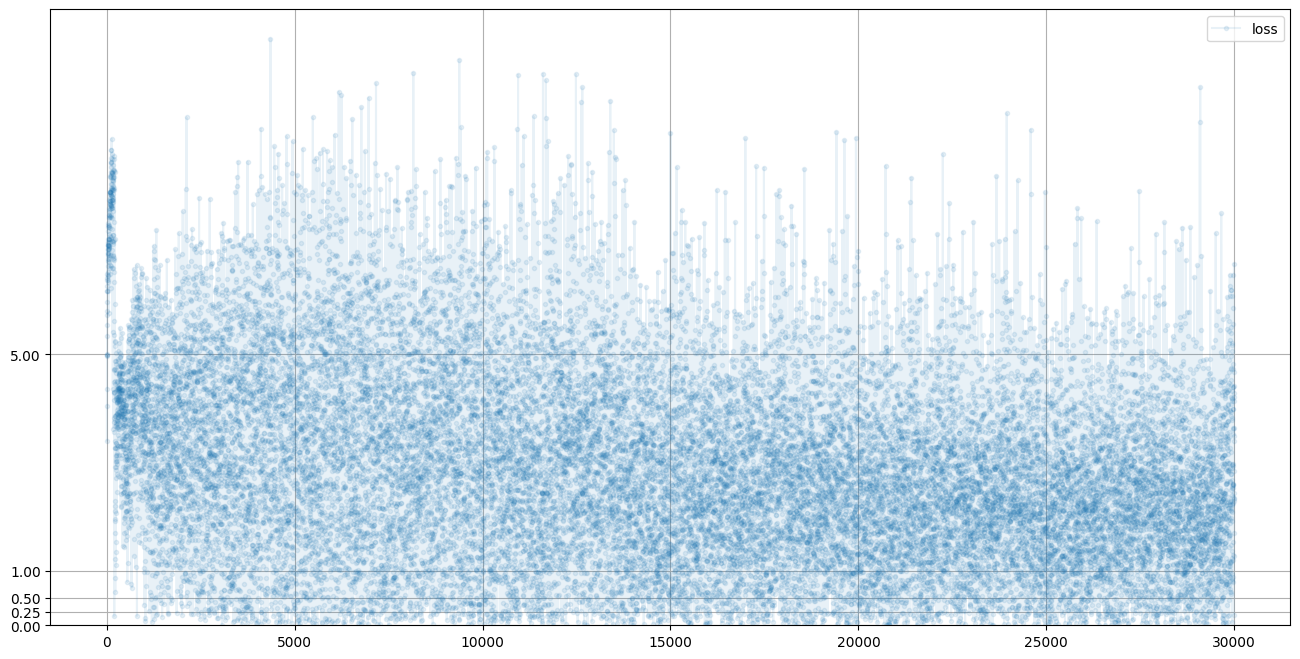

In [41]:
G.plot_progress()

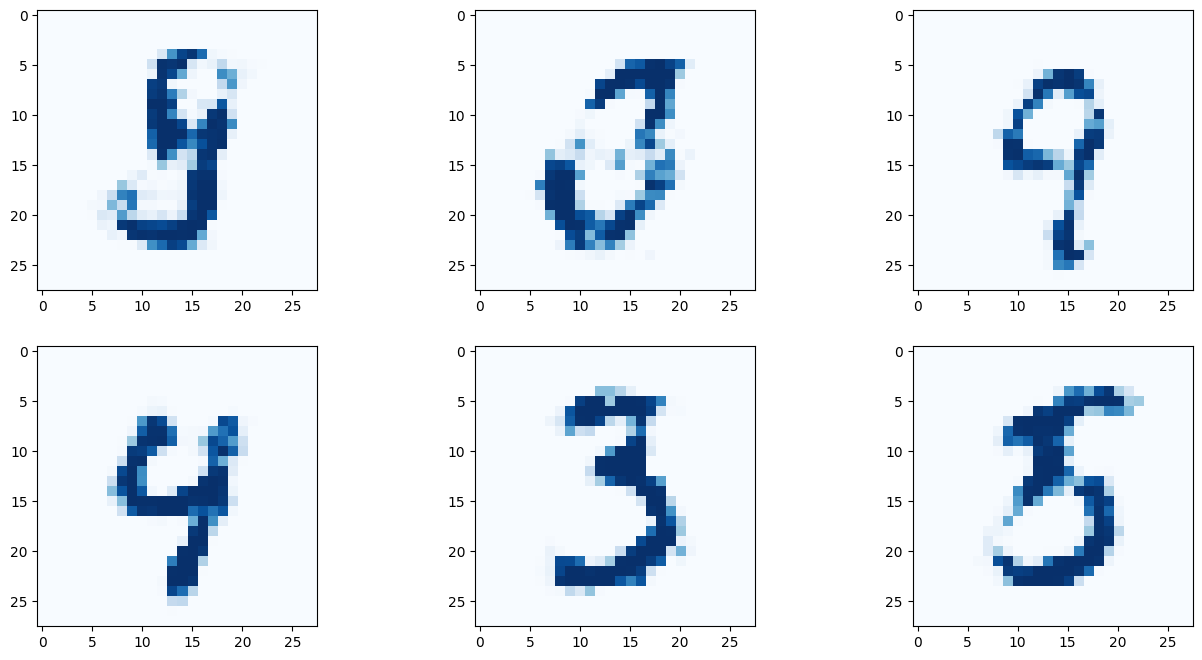

In [42]:
# 在3列2行的网格中生成图像
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

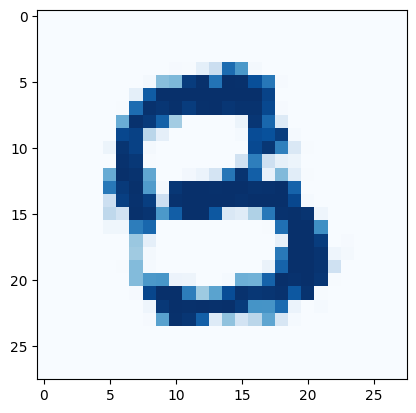

In [47]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.detach().numpy().reshape(28,28)
plt.imshow(img1, interpolation='none', cmap='Blues')

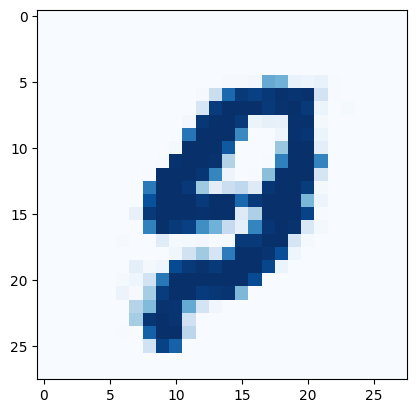

In [61]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.detach().numpy().reshape(28,28)
plt.imshow(img2, interpolation='none', cmap='Blues')

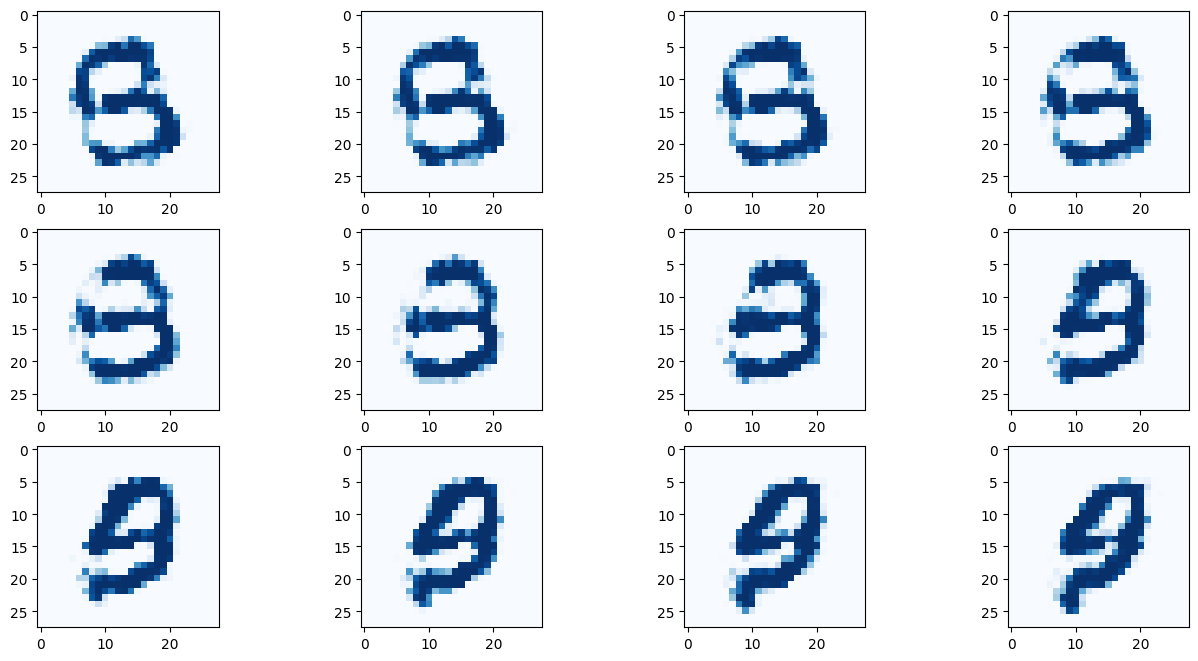

In [62]:
count = 0

# 在4列3行的网格中生成图像
f, axarr = plt.subplots(3,4, figsize=(16,8))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1)/11 * count
        output = G.forward(seed)
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap= 
        'Blues')
        count = count + 1
        pass
    pass